In [121]:
import matplotlib.pyplot as plot
import numpy
import pandas as pd
import seaborn
from scipy.stats import norm

def analyze_dataset(data: numpy.ndarray, label: str) -> None:
    # 1. Математическое ожидание (среднее значение)
    mean_value_1 = data.mean()
    print(f"Математическое ожидание: {mean_value_1:.3f} {label}")

    # 2. Дисперсия
    variance_1 = data.var()
    print(f"Дисперсия: {variance_1:.3f} {label}")

    # 3. Асимметрия
    skewness_1 = data.skew()
    print(f"Асимметрия: {skewness_1:.3f}")

    # 4. Эксцесс
    kurtosis_1 = data.kurtosis()
    print(f"Эксцесс: {kurtosis_1:.3f}")

    # 5. Квантили уровня 0,05 и 0,95
    quantile_05_1 = data.quantile(0.05)
    quantile_95_1 = data.quantile(0.95)
    print(f"Квантиль 0,05: {quantile_05_1:.3f} {label}")
    print(f"Квантиль 0,95: {quantile_95_1:.3f} {label}")

    # 2,5%-ная точка
    quantile_025_1 = data.quantile(0.025)
    print(f"2,5%-ная точка: {quantile_025_1:.3f} {label}")

1. Анализ данных о весе мужчин.

Данные взяты отсюда: https://www.kaggle.com/datasets/mustafaali96/weight-height

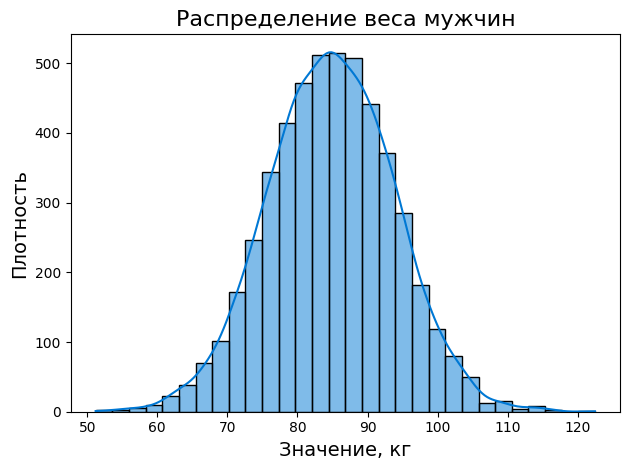

In [122]:
data = pd.read_csv("../datasets/weight-height.csv")
data["Height"] *= 2.54 # см
data["Weight"] /= 2.205 # кг

data_male = data[data["Gender"] == "Male"].copy()
heights_male = data_male["Height"].dropna()
weights_male = data_male["Weight"].dropna()

# Построение графика
seaborn.histplot(weights_male, kde=True, color="#0078d4", bins=30)
plot.title("Распределение веса мужчин", fontsize=16)

plot.xlabel("Значение, кг", fontsize=14)
plot.ylabel("Плотность", fontsize=14)
plot.tight_layout()
plot.show()

Характеристики распределения, близкого к нормальному

In [123]:
analyze_dataset(weights_male, "кг")

Математическое ожидание: 84.817 кг
Дисперсия: 80.480 кг
Асимметрия: 0.002
Эксцесс: 0.137
Квантиль 0,05: 70.204 кг
Квантиль 0,95: 99.312 кг
2,5%-ная точка: 67.075 кг


2. Анализ данных об отношении роста к весу (мужчины)

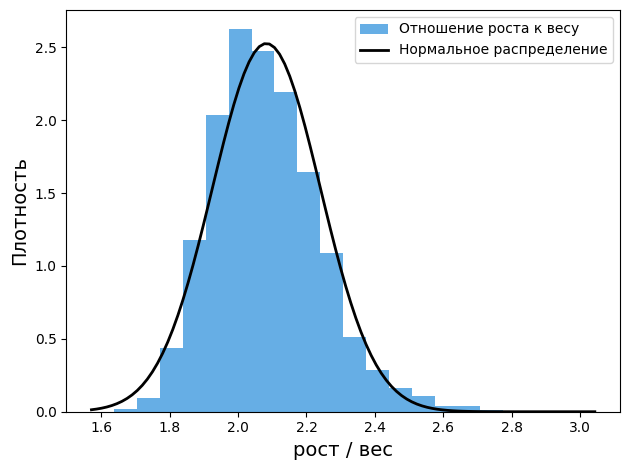

In [124]:
result = []

for index, _ in enumerate(heights_male):
    if heights_male[index] and weights_male[index]:
        result.append(heights_male[index] / weights_male[index])

data_heights_to_weights = pd.Series(result)

# Построение гистограммы
plot.hist(data_heights_to_weights, bins=20, density=True, alpha=0.6, color="#0078d4", label="Отношение роста к весу")

# Оценка параметров нормального распределения
mu_2, std_2 = data_heights_to_weights.mean(), data_heights_to_weights.std()

# Создание кривой нормального распределения
xmin, xmax = plot.xlim()
x = numpy.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_2, std_2)

# Наложение кривой нормального распределения
plot.plot(x, p, "k", linewidth=2, label="Нормальное распределение")
plot.xlabel("рост / вес", fontsize=14)
plot.ylabel("Плотность", fontsize=14)
plot.tight_layout()
plot.legend()
plot.show()


Характеристики распределения отношения роста к весу

In [125]:
analyze_dataset(data_heights_to_weights, "см/кг")

Математическое ожидание: 2.083 см/кг
Дисперсия: 0.025 см/кг
Асимметрия: 0.677
Эксцесс: 1.089
Квантиль 0,05: 1.853 см/кг
Квантиль 0,95: 2.354 см/кг
2,5%-ная точка: 1.822 см/кг
